<a href="https://colab.research.google.com/github/himanshu-nakrani/TMLC-Gen-ai-projects/blob/main/Intro_to_Vector_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using sentence transformers to generate embeddings

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
model.encode("Hi, I am Himanshu.")

array([-1.48615781e-02,  1.24473803e-01, -6.16338961e-02,  1.29468916e-02,
       -7.38042146e-02, -7.03023076e-02,  7.48221874e-02,  2.24148333e-02,
       -6.12955354e-02,  2.39535943e-02, -1.90760964e-03, -1.04340978e-01,
        4.03178111e-02, -5.50380163e-02,  6.45906404e-02, -6.30935952e-02,
       -4.54964582e-03, -4.67163101e-02, -6.82156309e-02, -6.66788816e-02,
       -2.08733305e-02,  2.85031125e-02, -2.02061776e-02, -5.75078167e-02,
        2.89213564e-02, -5.45745343e-02,  2.42247246e-02,  4.21726517e-02,
       -5.29601146e-03, -7.09285587e-02,  4.34435755e-02,  1.73806434e-03,
        3.20295207e-02, -2.07971949e-02, -7.05248117e-03,  1.30891815e-01,
       -4.80230749e-02, -3.16347629e-02, -4.39250395e-02, -2.73568113e-03,
       -1.72743306e-03,  1.50361024e-02,  2.59689130e-02, -4.53963205e-02,
        5.12135550e-02, -4.99814637e-02, -7.45376796e-02,  2.32615750e-02,
        8.65605846e-03, -3.58070843e-02, -8.67636278e-02,  5.44140823e-02,
        4.87096086e-02,  

## Using embeddings to find textual similarity

In [4]:
# Two lists of sentences
sentences1 = [
    "I am currently learning Generative AI",
]

sentences2 = [
    "Generative AI is so cool",
    "Machine Learning is used to solve tabular problems mostly",
]

# Compute embeddings for both lists
embeddings1 = model.encode(sentences1)
embeddings2 = model.encode(sentences2)

# Compute cosine similarities
similarities = model.similarity(embeddings1, embeddings2)

# Output the pairs with their score
for idx_i, sentence1 in enumerate(sentences1):
    print(sentence1)
    for idx_j, sentence2 in enumerate(sentences2):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

I am currently learning Generative AI
 - Generative AI is so cool      : 0.7465
 - Machine Learning is used to solve tabular problems mostly: 0.3403


## Using embeddings for Image Search (change with your images)

In [5]:
from PIL import Image

# Load CLIP model
model = SentenceTransformer("clip-ViT-B-32")

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

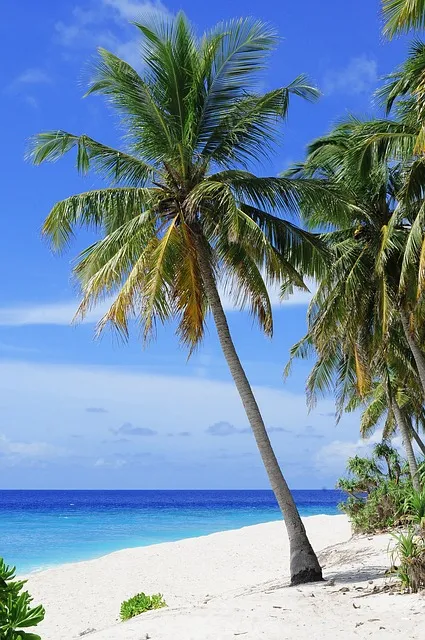

In [10]:
image = Image.open("/content/beach-2178747_640.webp")
resized_image = image
resized_image

In [11]:
# Encode an image:
img_emb = model.encode(resized_image)

# Encode text descriptions
text_emb = model.encode(
    ["Tree near the beach", "An animal running in the jungle","Tall standing tree"]
)

# Compute similarities
similarity_scores = model.similarity(img_emb, text_emb)
print(similarity_scores)

tensor([[0.2534, 0.2073, 0.2323]])


The similarity scores are too low but still Tree near the beach gets the highest similarity. Lets see what can increase the similarity? Maybe the change in text..

In [12]:
# Encode text descriptions
text_emb = model.encode(
    ["Tree near the beach showing the green leaves and in the background flowing the blue ocean with an green brownish beach"]
)
# Compute similarities
similarity_scores = model.similarity(img_emb, text_emb)
print(similarity_scores)

tensor([[0.2948]])
